In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

You can use matplotlib through pandas like before, or directly from the library itself.

There is the Global API and Object Oriented API. Global API is popular to use and it can be quick and easy for smaller graphs. As graphs get more complicated it can be beneficial to use the OOP version to be able to better control the plot and understand what is happening to the plot.

#### Global API:

In [2]:
x = np.arange(-10, 11)

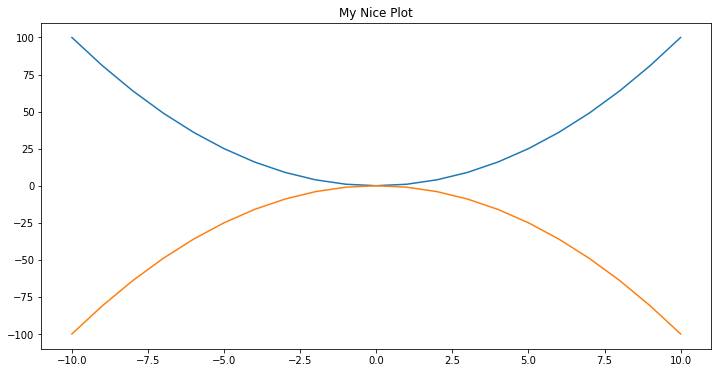

In [3]:
plt.figure(figsize=(12, 6))

plt.title('My Nice Plot')

plt.plot(x, x ** 2)
plt.plot(x, -1 * (x ** 2))

C:\Users\caleb\AppData\Local\Temp\ipykernel_5820\2627929940.py:6: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, 2, 1)  # rows, columns, panel selected


Text(0, 0.5, 'X Squared')

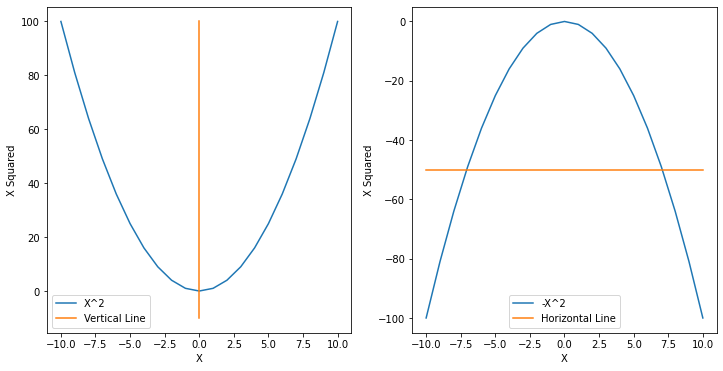

In [5]:
# this is a more complicated example and shows a weakness of using global as it uses just the plt import from import matplotlib.pyplot as plt
# it is more difficult to see how more complex plots are being modified as you can see the left and right plot dont have a way to distinguish besides order
plt.figure(figsize=(12, 6))
plt.title('My Nice Plot')

# left plot is here
plt.subplot(1, 2, 1)  # rows, columns, panel selected
plt.plot(x, x ** 2)
plt.plot([0, 0, 0], [-10, 0, 100])
plt.legend(['X^2', 'Vertical Line'])
plt.xlabel('X')
plt.ylabel('X Squared')

# right plot is here
plt.subplot(1, 2, 2)
plt.plot(x, -1 * (x ** 2))
plt.plot([-10, 0, 10], [-50, -50, -50])
plt.legend(['-X^2', 'Horizontal Line'])

plt.xlabel('X')
plt.ylabel('X Squared')

#### OOP Interface:

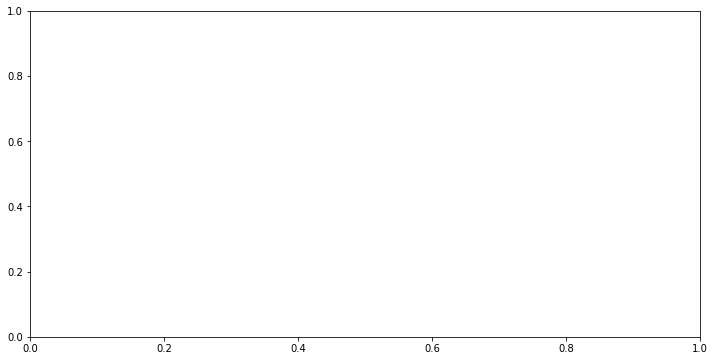

In [6]:
# this creates objects for the figure and axes that we can modify later. this can appear to be more code but it also has everything labeled specifically
fig, axes = plt.subplots(figsize=(12, 6))


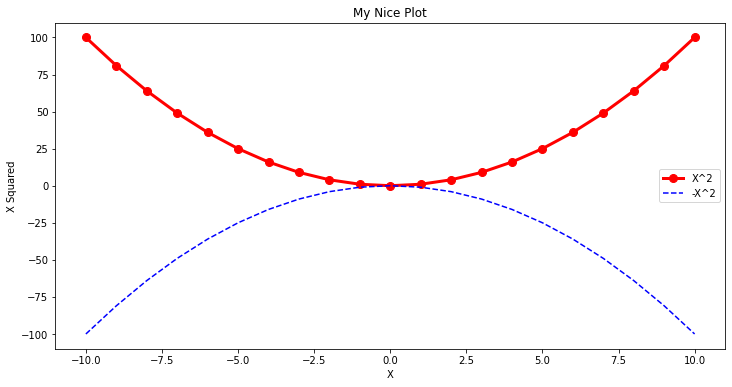

In [7]:
# adding our desired information to the axis. it does not matter what order we input the data unlike the global api.
axes.plot(
    x, (x ** 2), color='red', linewidth=3,
    marker='o', markersize=8, label='X^2')

axes.plot(x, -1 * (x ** 2), 'b--', label='-X^2')

axes.set_xlabel('X')
axes.set_ylabel('X Squared')

axes.set_title("My Nice Plot")

axes.legend()

# call the completed figure object
fig

Text(0.5, 1.0, 'My Nice Plot')

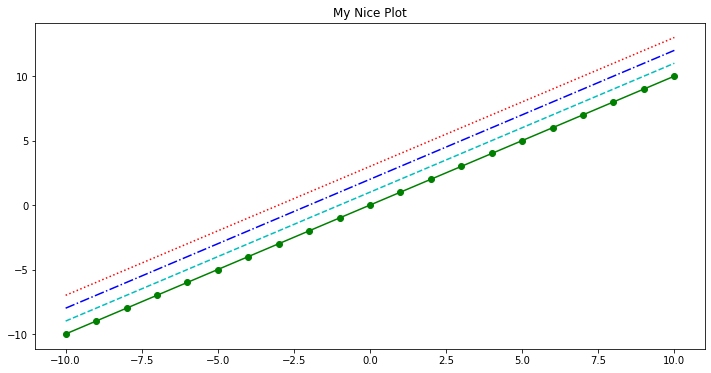

In [8]:
fig, axes = plt.subplots(figsize=(12, 6))

# you can plot with different line styles, there are a lot of different options!
axes.plot(x, x + 0, '-og', label="solid green")
axes.plot(x, x + 1, '--c', label="dashed cyan")
axes.plot(x, x + 2, '-.b', label="dashdot blue")
axes.plot(x, x + 3, ':r', label="dotted red")

axes.set_title("My Nice Plot")

In [9]:
print('Markers: {}'.format([m for m in plt.Line2D.markers]))

Markers: ['.', ',', 'o', 'v', '^', '<', '>', '1', '2', '3', '4', '8', 's', 'p', '*', 'h', 'H', '+', 'x', 'D', 'd', '|', '_', 'P', 'X', 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 'None', 'none', ' ', '']


In [10]:
linestyles = ['_', '-', '--', ':']

print('Line styles: {}'.format(linestyles))

Line styles: ['_', '-', '--', ':']


(<Figure size 1008x432 with 4 Axes>,
 array([[<AxesSubplot: >, <AxesSubplot: >],
        [<AxesSubplot: >, <AxesSubplot: >]], dtype=object))

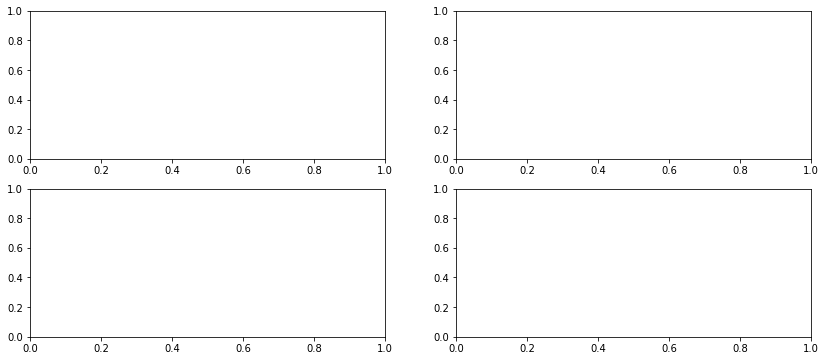

In [13]:
# we can create multiple plots in one figure using the subplots and specifiying rows and columsn

plot_objects = plt.subplots(nrows=2, ncols=2, figsize=(14, 6))

fig, ((ax1, ax2), (ax3, ax4)) = plot_objects

plot_objects

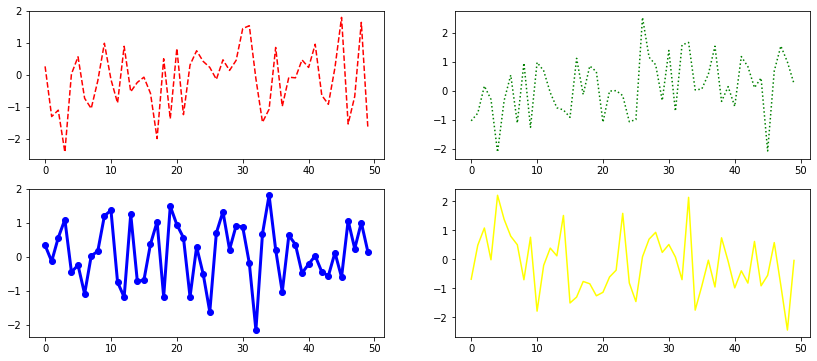

In [14]:
# here is more demonstration of different ways you can customize the graphs with multiple plots.
# as you can see it is easier to identify what is changing which plot unlike the Global API version
ax4.plot(np.random.randn(50), c='yellow')
ax1.plot(np.random.randn(50), c='red', linestyle='--')
ax2.plot(np.random.randn(50), c='green', linestyle=':')
ax3.plot(np.random.randn(50), c='blue', marker='o', linewidth=3.0)

fig

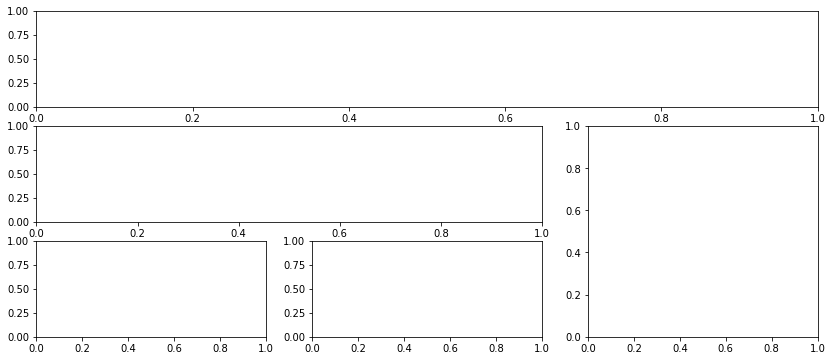

In [15]:
# you can use a grid like feature similar to CSS using subplot2grid

plt.figure(figsize=(14, 6))

ax1 = plt.subplot2grid((3,3), (0,0), colspan=3)
ax2 = plt.subplot2grid((3,3), (1,0), colspan=2)
ax3 = plt.subplot2grid((3,3), (1,2), rowspan=2)
ax4 = plt.subplot2grid((3,3), (2,0))
ax5 = plt.subplot2grid((3,3), (2,1))

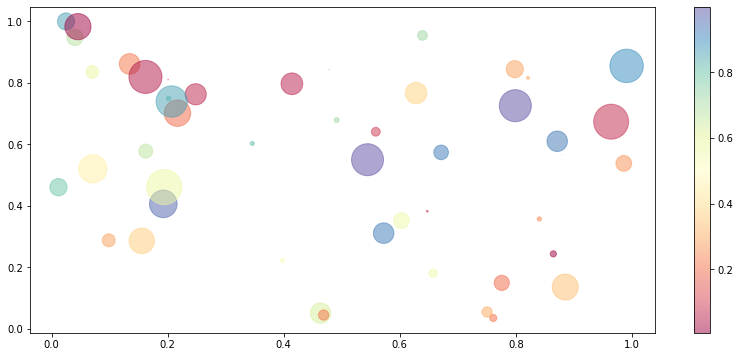

In [16]:
# You can create graphs to show distribtuions using colors
N = 50
x = np.random.rand(N)
y = np.random.rand(N)
colors = np.random.rand(N)
area = np.pi * (20 * np.random.rand(N))**2  # 0 to 15 point radii
plt.figure(figsize=(14, 6))

plt.scatter(x, y, s=area, c=colors, alpha=0.5, cmap='Spectral')
plt.colorbar()

plt.show()

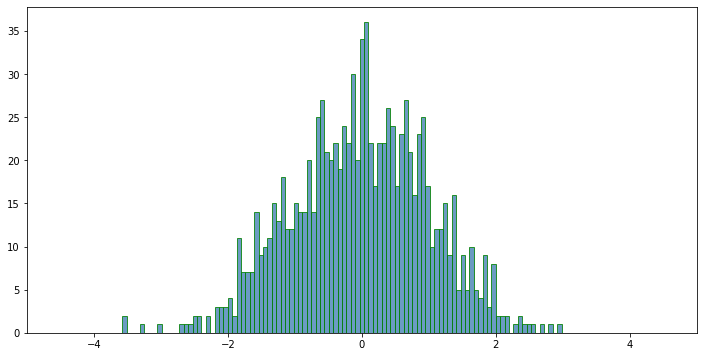

In [17]:
# And create histograms

values = np.random.randn(1000)
plt.subplots(figsize=(12, 6))

plt.hist(values, bins=100, alpha=0.8,
          histtype='bar', color='steelblue',
          edgecolor='green')
plt.xlim(xmin=-5, xmax=5)

plt.show()

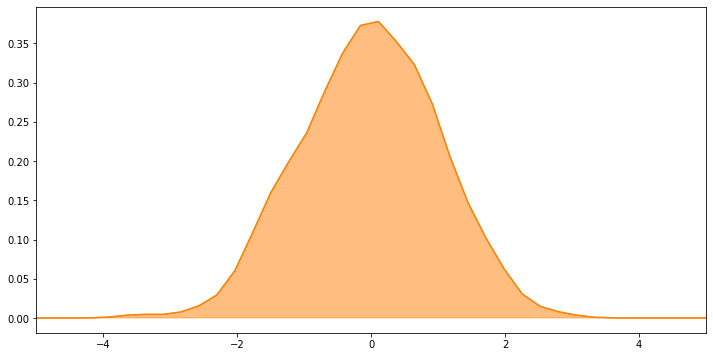

In [22]:
from scipy import stats

# can also use other libraries like scipy to do different calculations like for a Kernel Density Estimation

density = stats.gaussian_kde(values)
plt.subplots(figsize=(12, 6))

values2 = np.linspace(min(values)-10, max(values)+10, 100)

plt.plot(values2, density(values2), color='#FF7F00')
plt.fill_between(values2, 0, density(values2), alpha=0.5, color='#FF7F00')
plt.xlim(xmin=-5, xmax=5)

plt.show()